# PROJECT DESCRIPTION

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 
-------->  Independent Variables:
1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3.	Married - This refers to applicant being in a state of matrimony
4.	Dependents - This refres to persons who depends on the applicants for survival
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
------>  Target Variables
13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.
 

# What to do ? 
   You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset.

# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
loan = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Loan%20Application%20Status/loan_prediction.csv')

In [3]:
loan.head()

,LP001002,Male,No,0,Graduate,No.1,5849,0.1,Unnamed: 8,360,1,Urban,Y
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [4]:
# Adding Index Column into the Datafame

In [5]:
loan.columns = ['LoanID', 'Gender', 'Married','Dependents', 'Education', 'Self_Employed', 'Income', 'Coapplicant_Income', 'Loan_amount', 'Loan_term', 'Credit_History', 'Property_area', 'Loan_Status']

loan.head()

,LoanID,Gender,Married,Dependents,Education,Self_Employed,Income,Coapplicant_Income,Loan_amount,Loan_term,Credit_History,Property_area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [6]:
loan.tail()

,LoanID,Gender,Married,Dependents,Education,Self_Employed,Income,Coapplicant_Income,Loan_amount,Loan_term,Credit_History,Property_area,Loan_Status
608,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
609,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
610,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
611,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
612,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [7]:
loan.shape

(613, 13)

In [8]:
loan.columns

Index(['LoanID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Income', 'Coapplicant_Income', 'Loan_amount',
       'Loan_term', 'Credit_History', 'Property_area', 'Loan_Status'],
      dtype='object')

In [9]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LoanID              613 non-null    object 
 1   Gender              600 non-null    object 
 2   Married             610 non-null    object 
 3   Dependents          598 non-null    object 
 4   Education           613 non-null    object 
 5   Self_Employed       581 non-null    object 
 6   Income              613 non-null    int64  
 7   Coapplicant_Income  613 non-null    float64
 8   Loan_amount         592 non-null    float64
 9   Loan_term           599 non-null    float64
 10  Credit_History      563 non-null    float64
 11  Property_area       613 non-null    object 
 12  Loan_Status         613 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


# Observation - 
        1. We have 613 rows and 13 columns here
        2. Dataset contains 3 datatypes - Object, Float, Int

# Checking Null Values

In [10]:
loan.isna().sum()

LoanID                 0
Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Income                 0
Coapplicant_Income     0
Loan_amount           21
Loan_term             14
Credit_History        50
Property_area          0
Loan_Status            0
dtype: int64

<Axes: >

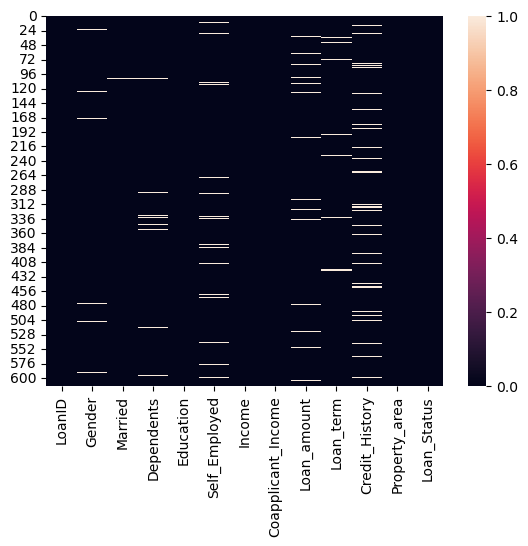

In [11]:
sns.heatmap(loan.isnull())

# We have huge values in the dataframe 
# Lets fill the null Values using Mean (for Numerical Columns) and Mode(For Categorical Columns)

In [12]:
for col in loan.columns:
    if loan[col].dtype in ['int64', 'float64']:
        loan[col].fillna(loan[col].mean(), inplace=True)

In [13]:
for col in loan.columns:
    if loan[col].dtype in ['object']:
        loan[col].fillna(loan[col].mode()[0], inplace=True)

In [14]:
loan.isna().sum()

LoanID                0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Income                0
Coapplicant_Income    0
Loan_amount           0
Loan_term             0
Credit_History        0
Property_area         0
Loan_Status           0
dtype: int64

<Axes: >

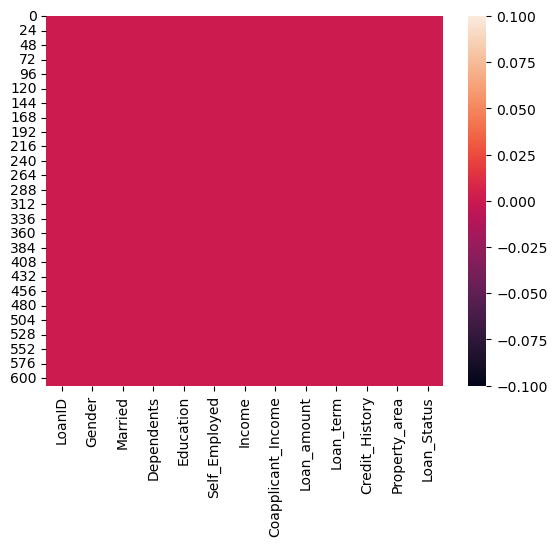

In [15]:
sns.heatmap(loan.isnull())

# Checking the Unique Values of the columns

In [16]:
for i in loan.columns:
    print(loan[i].value_counts())
    print('\n')

LoanID
LP001003    1
LP002332    1
LP002308    1
LP002314    1
LP002315    1
           ..
LP001693    1
LP001698    1
LP001699    1
LP001702    1
LP002990    1
Name: count, Length: 613, dtype: int64


Gender
Male      501
Female    112
Name: count, dtype: int64


Married
Yes    401
No     212
Name: count, dtype: int64


Dependents
0     359
1     102
2     101
3+     51
Name: count, dtype: int64


Education
Graduate        479
Not Graduate    134
Name: count, dtype: int64


Self_Employed
No     531
Yes     82
Name: count, dtype: int64


Income
2500    9
4583    6
2600    6
6000    6
5000    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: count, Length: 504, dtype: int64


Coapplicant_Income
0.0       272
2500.0      5
2083.0      5
1666.0      5
1459.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: count, Length: 287, dtype: int64


Loan_amount
146.412162    21
120.000000    20
110.000000    17
100.000000    15
160.

In [17]:
# Converting Object data into Int64

In [18]:
loan['Dependents'] = loan['Dependents'].replace('3+', 3)
loan['Dependents'] = loan['Dependents'].astype('int64')

In [19]:
loan.describe()

,Dependents,Income,Coapplicant_Income,Loan_amount,Loan_term,Credit_History
count,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000
mean,0.745514,5402.732463,1623.890571,146.412162,341.969950,0.841918
std,1.009999,6114.004114,2927.903583,84.106098,64.420943,0.349908
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2876.000000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3812.000000,1210.000000,129.000000,360.000000,1.000000
75%,1.000000,5780.000000,2302.000000,165.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


# Statistics - 
        1. There is huge difference between Mean & Median 'Income','Coapplicant_Income','Loan_amount','loan_term' 
        2.  Standard Deviation is also high of these columns 
        3.  This indicates that there is high skewness present in the dataset in column - 'Income','Coapplicant_Income'
        4.  We are observing that ther is outliers present in the dataset

# Lets check the Skewness 

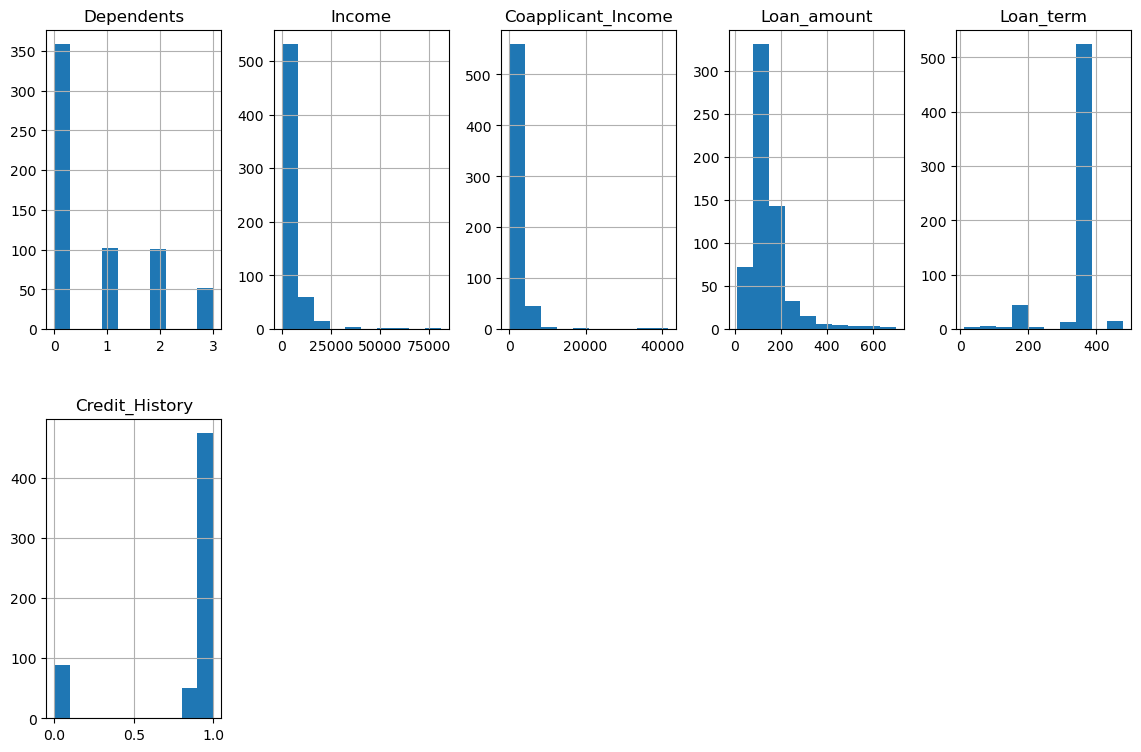

In [20]:
loan.hist(figsize=(14,14),grid=True,layout=(3,5))
plt.show()

In [21]:
numerical=['Dependents','Income','Coapplicant_Income','Loan_amount','Loan_term','Credit_History']

In [22]:
loan[numerical].skew()

Dependents            1.013119
Income                6.534654
Coapplicant_Income    7.488653
Loan_amount           2.724391
Loan_term            -2.386832
Credit_History       -1.960728
dtype: float64

In [23]:
# Removing Skewness using log Method

In [24]:
loan['Income'] = np.log(loan['Income'])  

# Calculate skewness after transformation
skewness_after = loan['Income'].skew()
print(f"Skewness after transformation: {skewness_after}")

Skewness after transformation: 0.4818102304131767


In [25]:
loan['Coapplicant_Income'] = np.log(loan['Coapplicant_Income']+1.0)  

# Calculate skewness after transformation
skewness_after = loan['Coapplicant_Income'].skew()
print(f"Skewness after transformation: {skewness_after}")

Skewness after transformation: -0.17666495835254706


In [26]:
loan['Loan_amount'] = np.log(loan['Loan_amount'])  

# Calculate skewness after transformation
skewness_after = loan['Loan_amount'].skew()
print(f"Skewness after transformation: {skewness_after}")

Skewness after transformation: -0.2218773710179033


In [27]:
loan['Loan_term'] = np.log(loan['Loan_term']) 

# Calculate skewness after transformation
skewness_after = loan['Loan_term'].skew()
print(f"Skewness after transformation: {skewness_after}")

Skewness after transformation: -4.863911650527212


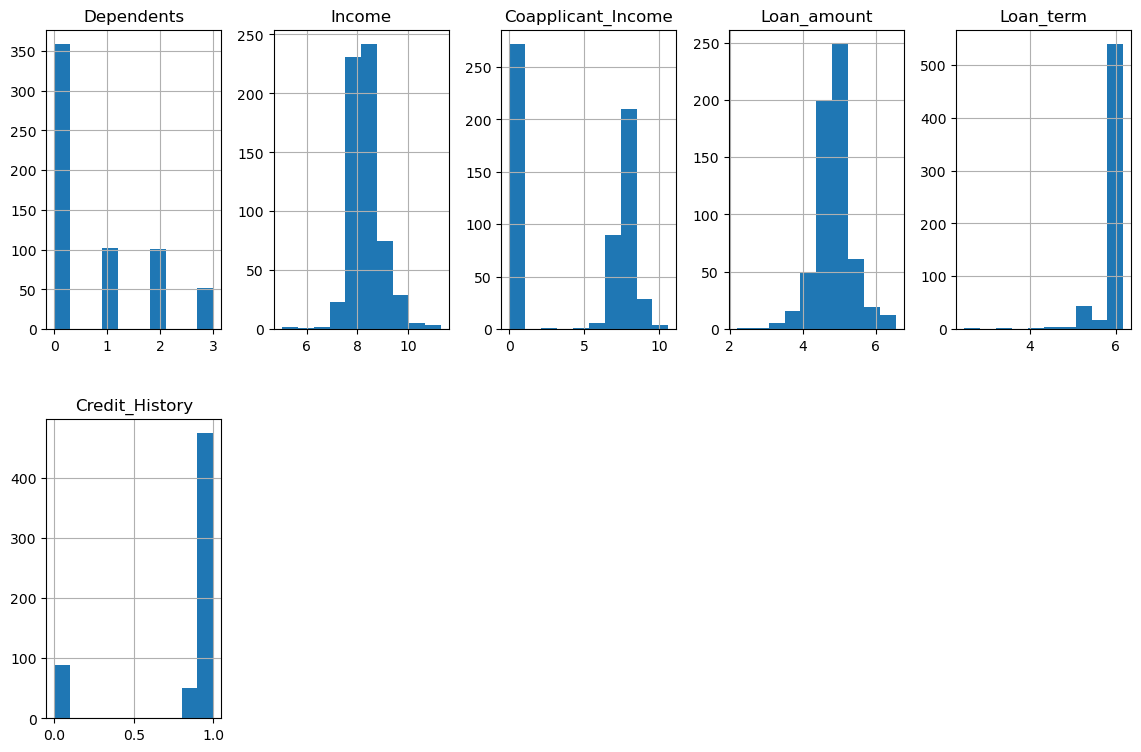

In [28]:
loan.hist(figsize=(14,14),grid=True,layout=(3,5))
plt.show()

# Checking for the Outliers

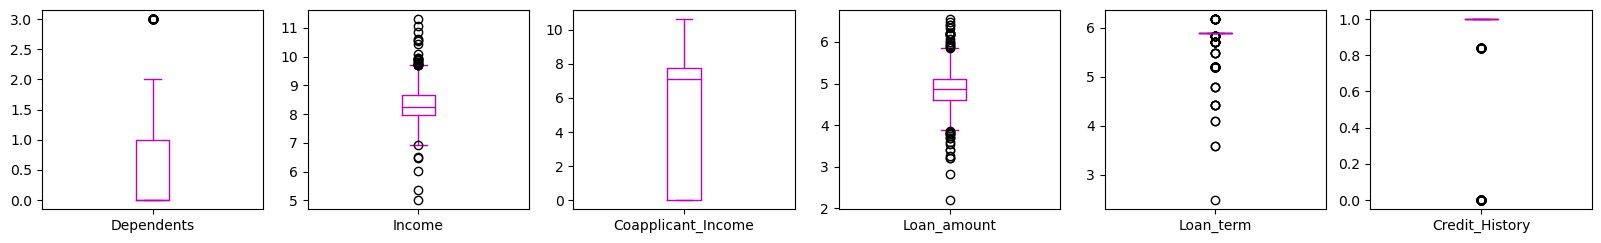

In [29]:
loan.plot(kind='box',subplots=True,layout=(5,6),figsize=(20,15),color='m')
plt.show()

#There is huge outliers in the Loan amount and Income column

# Removing Outliers using Zscore method

In [30]:
from scipy.stats import zscore

In [31]:
z=np.abs(zscore(loan[numerical]))
z.head(2)

,Dependents,Income,Coapplicant_Income,Loan_amount,Loan_term,Credit_History
0,0.252172,0.138639,0.780496,0.019802,0.269403,0.452149
1,0.738736,0.518200,1.109798,1.353759,0.269403,0.452149


In [32]:
threshold=3

In [33]:
loan=loan[(z<3).all(axis=1)]
loan.head(2)

,LoanID,Gender,Married,Dependents,Education,Self_Employed,Income,Coapplicant_Income,Loan_amount,Loan_term,Credit_History,Property_area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,8.430109,7.319202,4.852030,5.886104,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,8.006368,0.000000,4.189655,5.886104,1.0,Urban,Y


In [34]:
loan.shape

(587, 13)

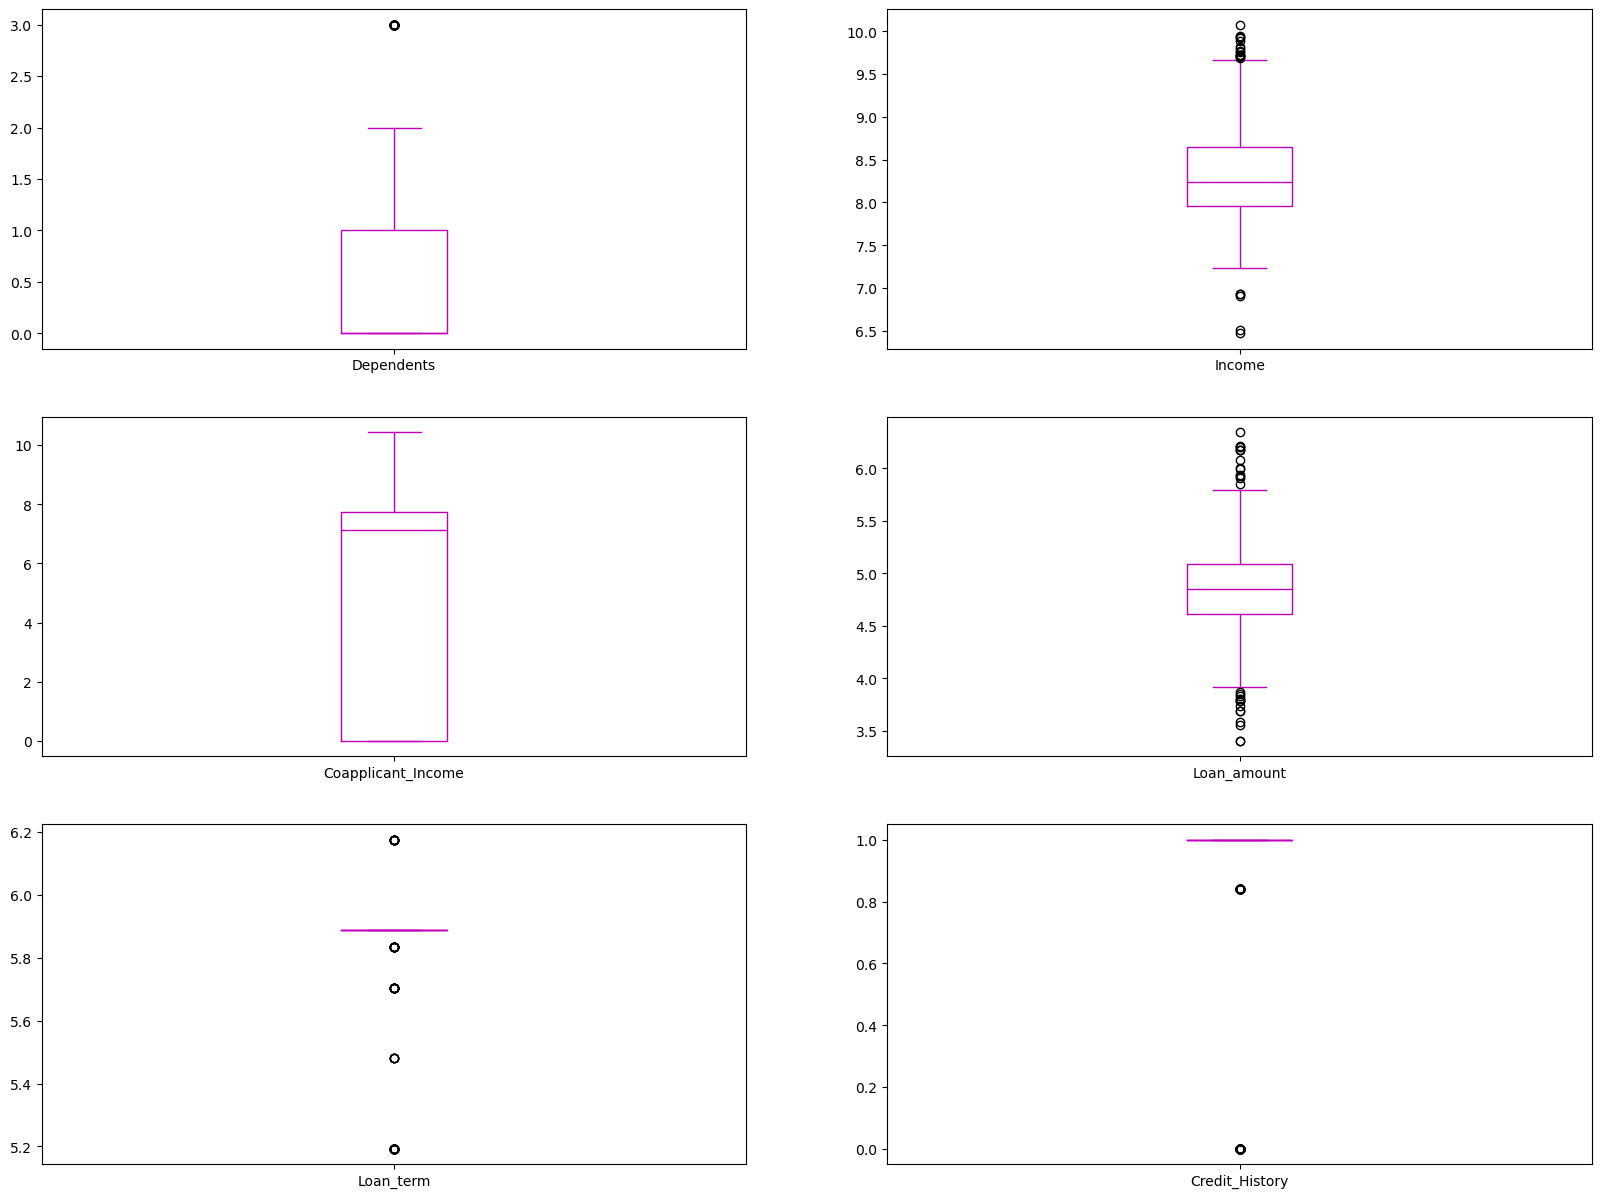

In [35]:
loan.plot(kind='box',subplots=True,layout=(3,2),figsize=(20,15),color='m')
plt.show()

In [36]:
loan.describe()

,Dependents,Income,Coapplicant_Income,Loan_amount,Loan_term,Credit_History
count,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000
mean,0.727428,8.324780,4.340822,4.861180,5.836836,0.839401
std,1.000331,0.554954,3.866534,0.446594,0.187155,0.352973
min,0.000000,6.469250,0.000000,3.401197,5.192957,0.000000
25%,0.000000,7.963460,0.000000,4.610145,5.886104,1.000000
50%,0.000000,8.242756,7.139660,4.852030,5.886104,1.000000
75%,1.000000,8.649186,7.742836,5.087596,5.886104,1.000000
max,3.000000,10.077567,10.429340,6.345636,6.173786,1.000000


In [37]:
# Now We Have Removed enough amount of outliers as well as our 
# Standard deviation looks low which mean the data is not much skewed

# Data Visualization

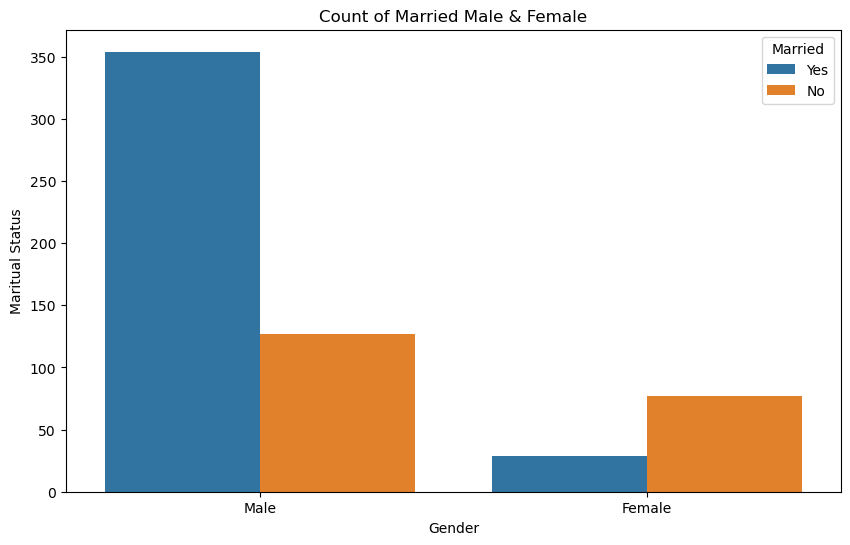

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(x="Gender", hue="Married", data=loan)
plt.xlabel('Gender')
plt.ylabel('Maritual Status')
plt.title('Count of Married Male & Female')
plt.show()

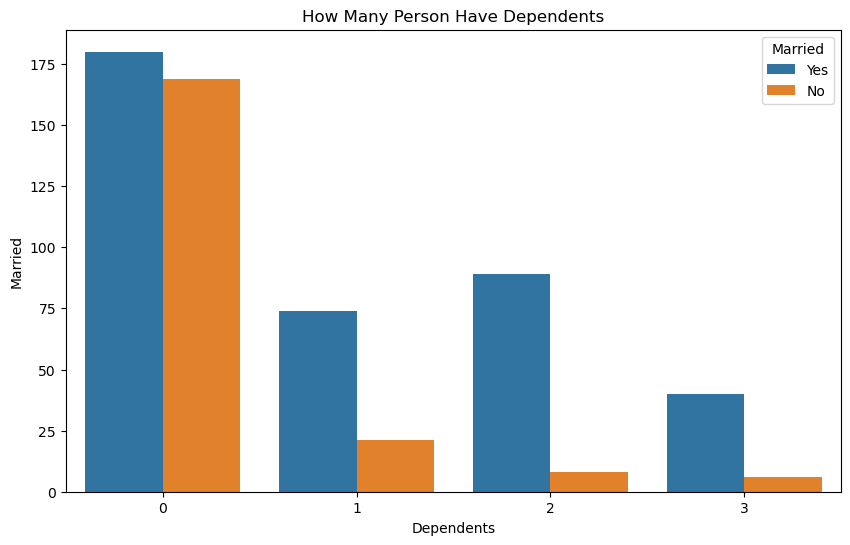

In [39]:
plt.figure(figsize=(10,6))
sns.countplot(x='Dependents',hue='Married',data=loan)
plt.xlabel('Dependents')
plt.ylabel('Married')
plt.title('How Many Person Have Dependents')
plt.show()

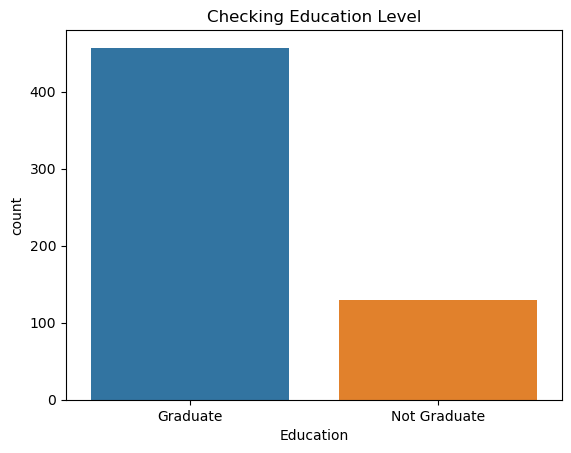

In [40]:
sns.countplot(x='Education',data=loan)
plt.title('Checking Education Level')
plt.show()


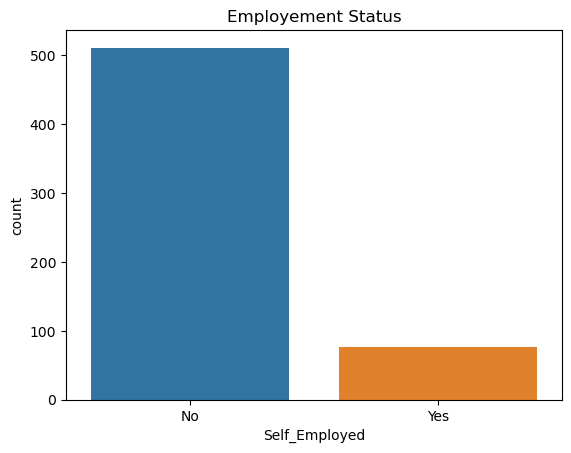

In [41]:
sns.countplot(x='Self_Employed',data=loan)
plt.title('Employement Status')
plt.show()

Text(0.5, 1.0, 'Where people Live more')

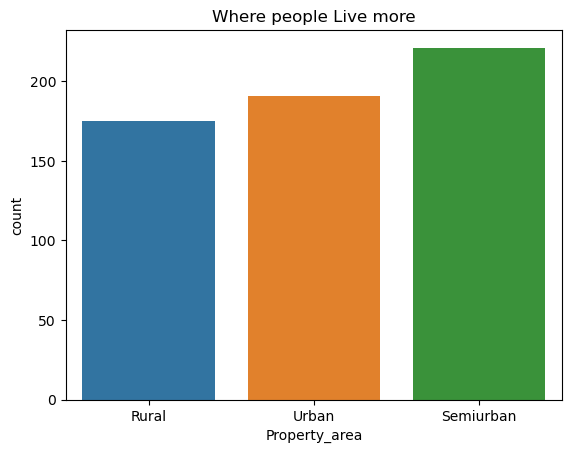

In [42]:
sns.countplot(x='Property_area',data=loan)
plt.title('Where people Live more')

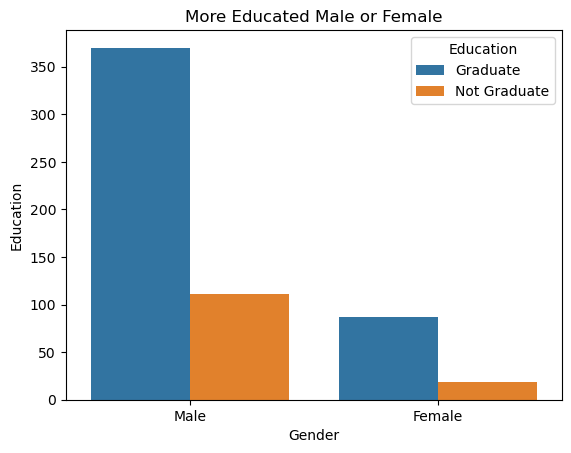

In [43]:
# Who is more Educated Male or Female
sns.countplot(x='Gender',hue
             ='Education',data=loan)
plt.xlabel('Gender')
plt.ylabel('Education')
plt.title('More Educated Male or Female')
plt.show()

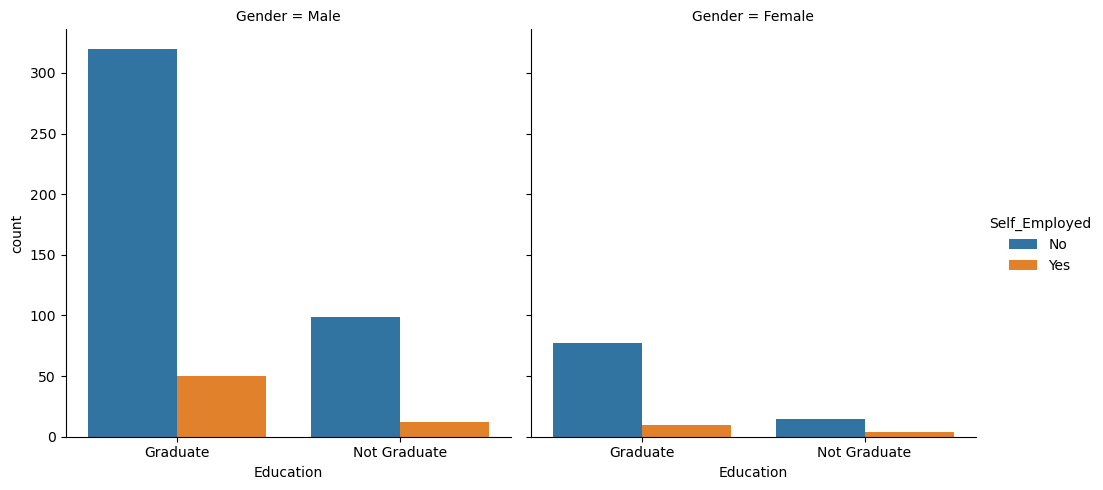

In [44]:
# How many Person will get job
sns.catplot(x='Education', hue='Self_Employed', col='Gender', data=loan, kind='count')
plt.show()

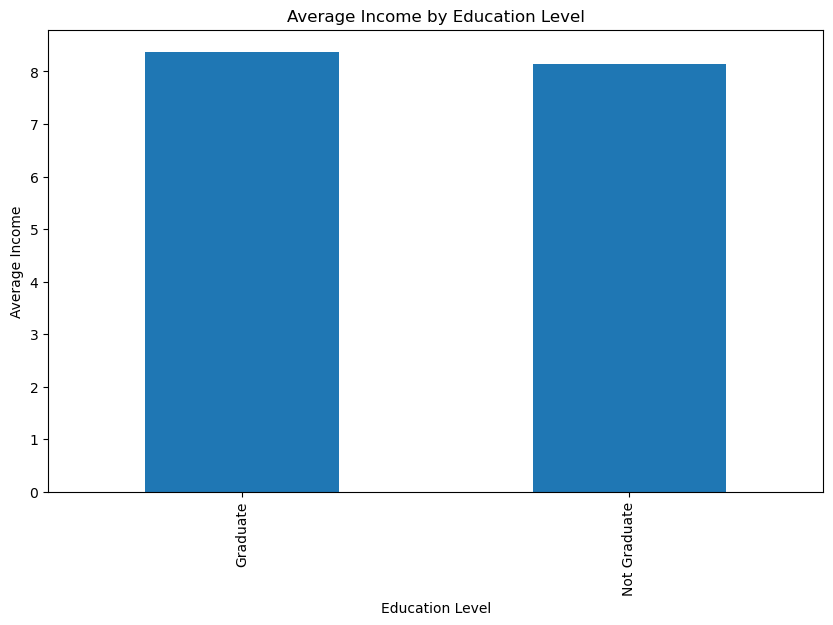

In [45]:
avg_income = loan.groupby('Education')['Income'].mean()

plt.figure(figsize=(10,6))
avg_income.plot(kind='bar')
plt.title('Average Income by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Income')
plt.show()

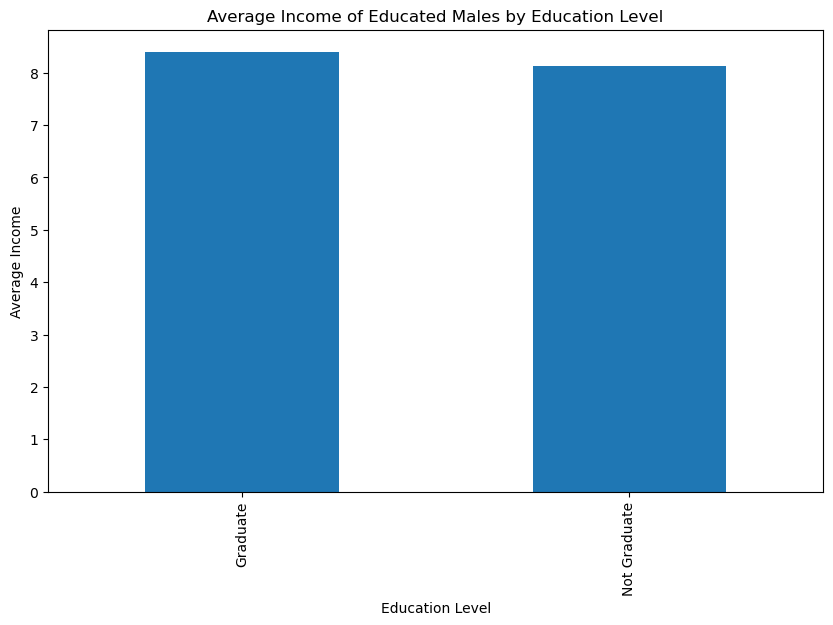

In [46]:
avg_income_male = loan[loan['Gender'] == 'Male'].groupby('Education')['Income'].mean()

plt.figure(figsize=(10,6))
avg_income_male.plot(kind='bar')
plt.title('Average Income of Educated Males by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Income')
plt.show()

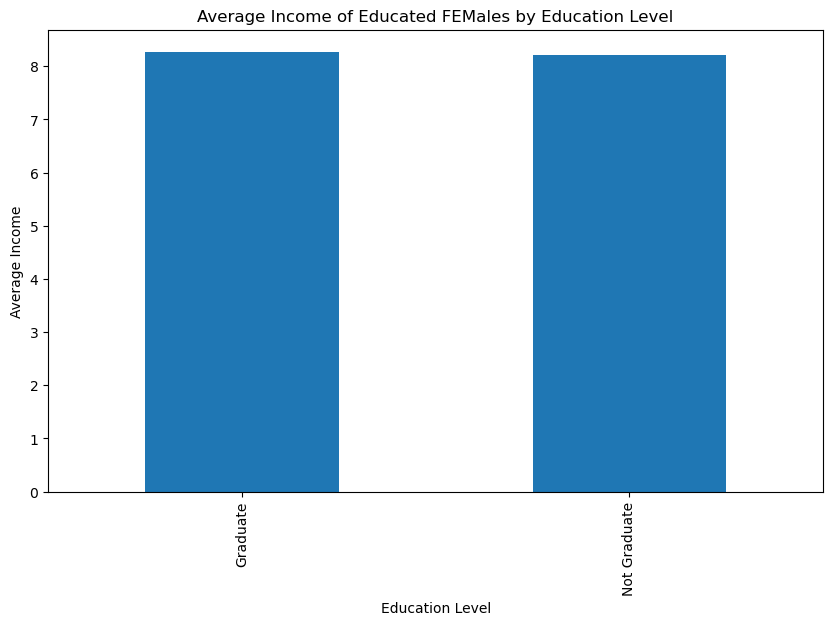

In [47]:
avg_income_male = loan[loan['Gender'] == 'Female'].groupby('Education')['Income'].mean()

plt.figure(figsize=(10,6))
avg_income_male.plot(kind='bar')
plt.title('Average Income of Educated FEMales by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Income')
plt.show()

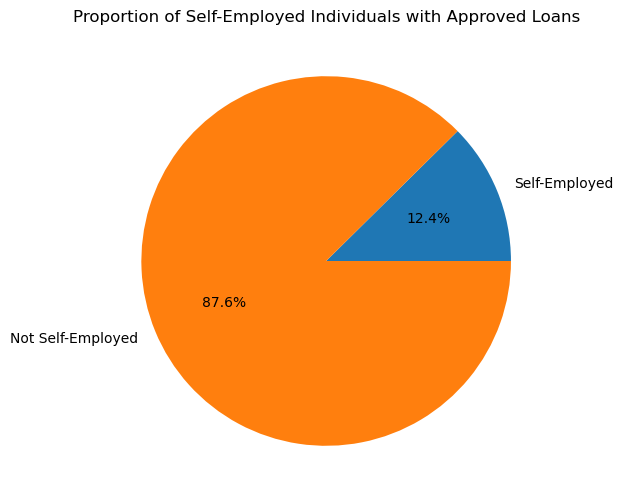

In [48]:
approved_loans = loan[loan['Loan_Status'] == 'Y']
self_employed_approved = approved_loans[approved_loans['Self_Employed'] == 'Yes']

plt.figure(figsize=(8,6))
plt.pie([len(self_employed_approved), len(approved_loans) - len(self_employed_approved)], 
        labels=['Self-Employed', 'Not Self-Employed'], 
        autopct='%1.1f%%')
plt.title('Proportion of Self-Employed Individuals with Approved Loans')
plt.show()

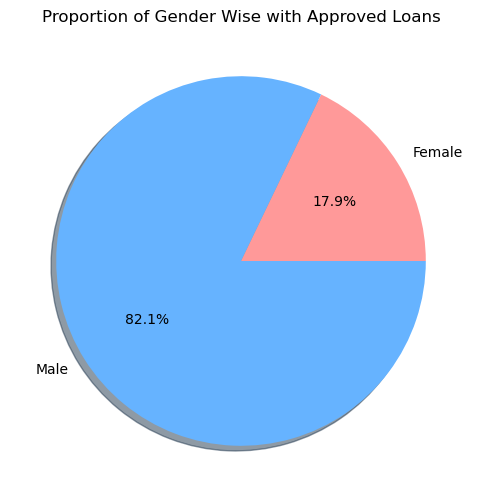

In [49]:
approved_loans = loan[loan['Loan_Status'] == 'Y']
Gender_approved = approved_loans[approved_loans['Gender'] == 'Female']

plt.figure(figsize=(8,6))
plt.pie([len(Gender_approved), len(approved_loans) - len(Gender_approved)], 
        labels=['Female', 'Male'], 
        autopct='%1.1f%%',
        colors = ['#ff9999','#66b3ff'],
       shadow=True)
plt.title('Proportion of Gender Wise with Approved Loans')
plt.show()

<Axes: xlabel='Credit_History', ylabel='count'>

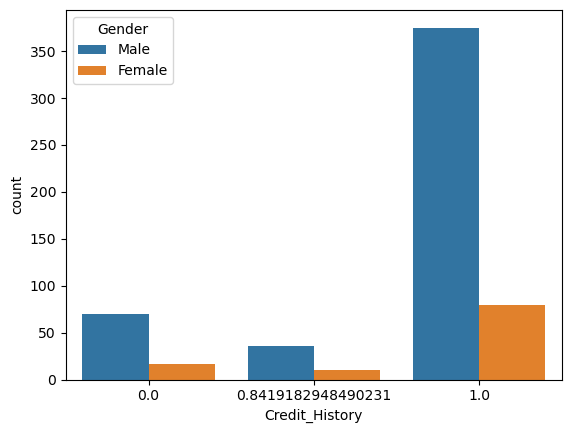

In [50]:
sns.countplot(x='Credit_History',hue='Gender',data=loan)

# Dropping the LoanID Columns because there is no need here in building model

In [51]:
loan.drop(columns='LoanID',inplace=True)

# Categorical Columns to Numerical Columns
# Using Label Encoder

In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
le=LabelEncoder()

In [54]:
list1=['Gender','Married','Education','Self_Employed','Property_area','Loan_Status']
for val in list1:
    loan[val]=le.fit_transform(loan[val].astype(str))

In [55]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,Income,Coapplicant_Income,Loan_amount,Loan_term,Credit_History,Property_area,Loan_Status
0,1,1,1,0,0,8.430109,7.319202,4.852030,5.886104,1.0,0,0
1,1,1,0,0,1,8.006368,0.000000,4.189655,5.886104,1.0,2,1
2,1,1,0,1,0,7.856707,7.765993,4.787492,5.886104,1.0,2,1
3,1,0,0,0,0,8.699515,0.000000,4.948760,5.886104,1.0,2,1
4,1,1,2,0,1,8.597297,8.342125,5.587249,5.886104,1.0,2,1


# Checking Correlation

In [56]:
loan_corr=loan.corr()

In [57]:
loan_corr 

,Gender,Married,Dependents,Education,Self_Employed,Income,Coapplicant_Income,Loan_amount,Loan_term,Credit_History,Property_area,Loan_Status
Gender,1.000000,0.373518,0.191008,0.047731,-0.003641,0.051317,0.238010,0.163310,-0.100535,0.019556,-0.023069,0.007384
Married,0.373518,1.000000,0.334300,0.018773,-0.006263,0.006486,0.324034,0.195775,-0.120355,0.011511,0.016141,0.085251
Dependents,0.191008,0.334300,1.000000,0.059251,0.059480,0.116840,0.004153,0.139492,-0.081241,-0.023442,-0.003540,0.010459
Education,0.047731,0.018773,0.059251,1.000000,-0.010160,-0.183055,0.047736,-0.142436,-0.105213,-0.083493,-0.065212,-0.090654
Self_Employed,-0.003641,-0.006263,0.059480,-0.010160,1.000000,0.190544,-0.080443,0.112838,-0.021072,-0.008415,-0.032611,-0.023815
Income,0.051317,0.006486,0.116840,-0.183055,0.190544,1.000000,-0.363003,0.502530,-0.043315,0.054607,-0.046840,-0.016922
Coapplicant_Income,0.238010,0.324034,0.004153,0.047736,-0.080443,-0.363003,1.000000,0.171880,0.003997,-0.002004,-0.055262,0.064584
Loan_amount,0.163310,0.195775,0.139492,-0.142436,0.112838,0.502530,0.171880,1.000000,0.076818,0.002085,-0.104731,-0.049324
Loan_term,-0.100535,-0.120355,-0.081241,-0.105213,-0.021072,-0.043315,0.003997,0.076818,1.000000,0.037425,-0.067887,-0.006384
Credit_History,0.019556,0.011511,-0.023442,-0.083493,-0.008415,0.054607,-0.002004,0.002085,0.037425,1.000000,-0.012626,0.555489


<Axes: >

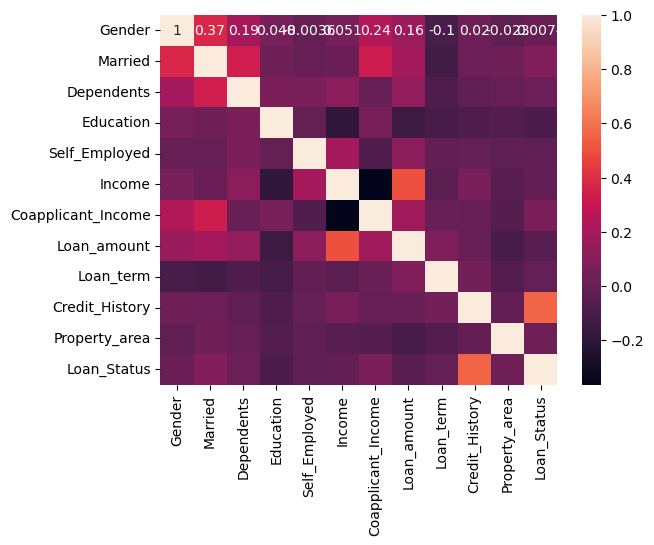

In [58]:
sns.heatmap(loan_corr,annot=True)

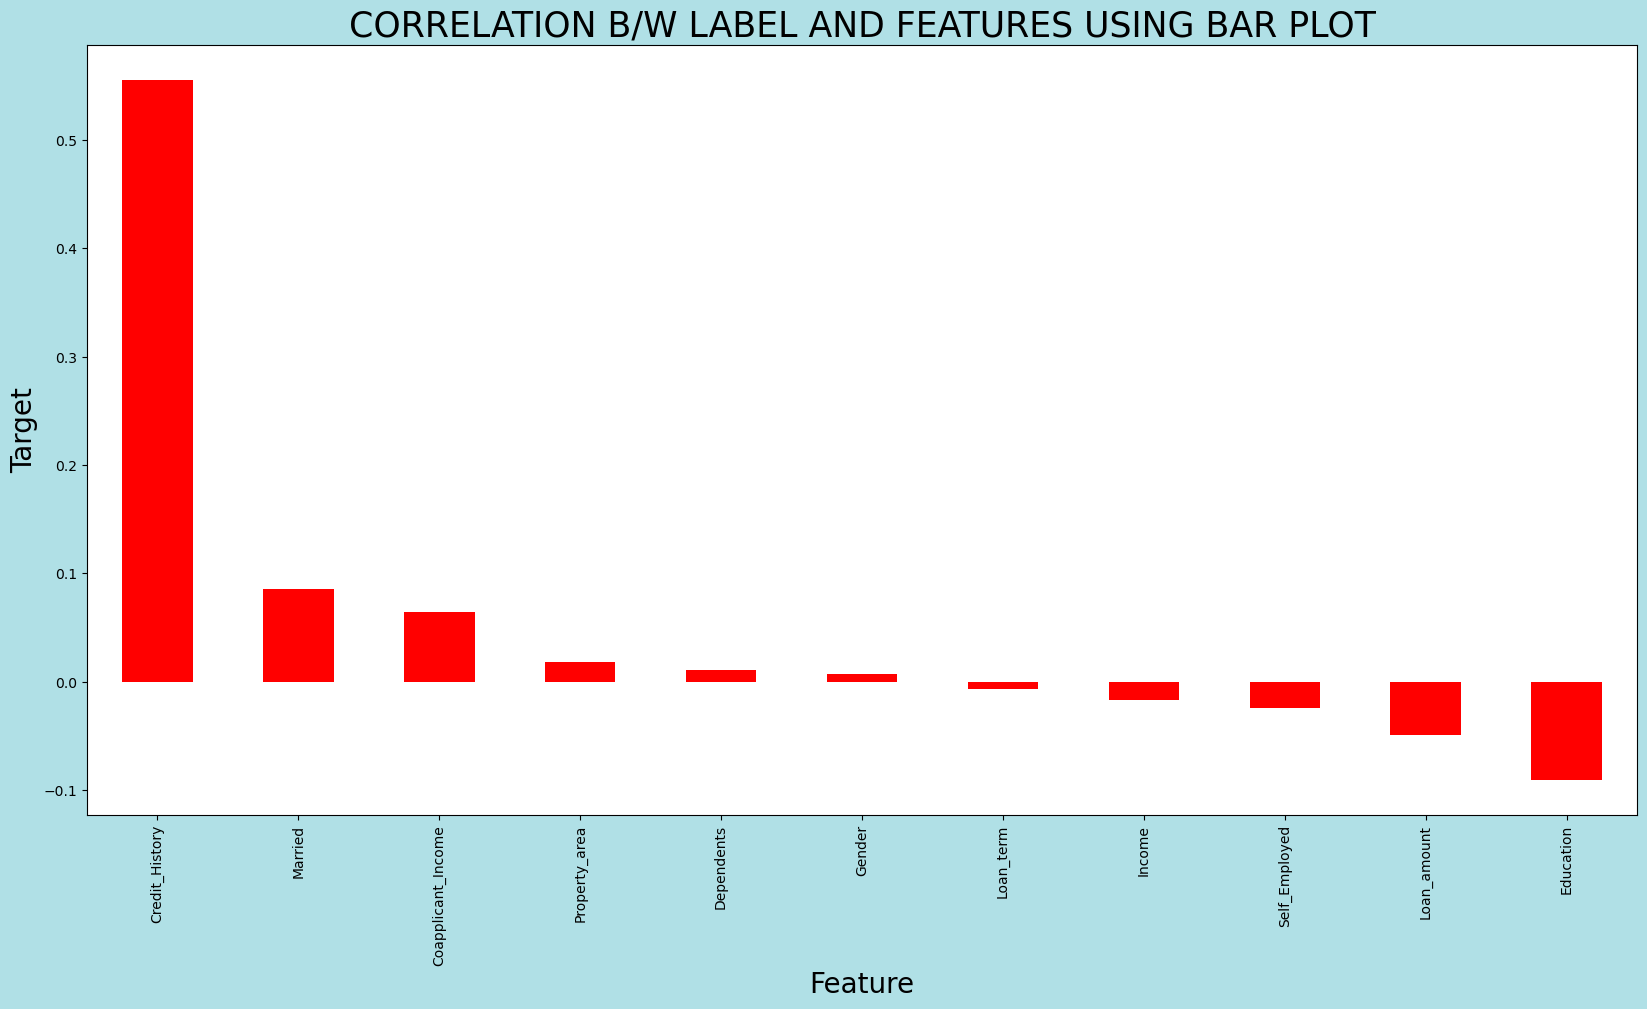

In [59]:
# VISUALIZING THE CORRELATION B/W LABEL AND FEATURES USING BAR PLOT

plt.figure(figsize=(20,10),facecolor='powderblue')
loan.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='r')
plt.xlabel('Feature',fontsize=20)
plt.ylabel('Target',fontsize=20)
plt.title('CORRELATION B/W LABEL AND FEATURES USING BAR PLOT',fontsize=25)
plt.show()

In [60]:
# Seprating the dataframe into X and Y
feature=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Income', 'Coapplicant_Income', 'Loan_amount', 'Loan_term',
       'Credit_History', 'Property_area']
x=loan[feature]
y=loan['Loan_Status']

# Standard Scaling -- to make data into One frame

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
st=StandardScaler()

In [63]:
x=pd.DataFrame(st.fit_transform(x),columns=x.columns)
x.head()

,Gender,Married,Dependents,Education,Self_Employed,Income,Coapplicant_Income,Loan_amount,Loan_term,Credit_History,Property_area
0,0.46944,0.729820,0.272715,-0.533352,-0.385653,0.189959,0.770954,-0.020506,0.263474,0.455379,-1.301717
1,0.46944,0.729820,-0.727807,-0.533352,2.593007,-0.574254,-1.123622,-1.504943,0.263474,0.455379,1.232638
2,0.46944,0.729820,-0.727807,1.874936,-0.385653,-0.844166,0.886606,-0.165142,0.263474,0.455379,1.232638
3,0.46944,-1.370201,-0.727807,-0.533352,-0.385653,0.675829,-1.123622,0.196273,0.263474,0.455379,1.232638
4,0.46944,0.729820,1.273236,-0.533352,2.593007,0.491481,1.035738,1.627178,0.263474,0.455379,1.232638


# Checking Variance Inflation Factor -- to check the multicollinearity

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [65]:
vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x.values,i) for i in range (len(x.columns))]
vif['features']=x.columns
vif

,VIF Values,features
0,1.216525,Gender
1,1.407814,Married
2,1.171867,Dependents
3,1.074714,Education
4,1.042260,Self_Employed
5,1.964022,Income
6,1.615530,Coapplicant_Income
7,1.730887,Loan_amount
8,1.062877,Loan_term
9,1.014419,Credit_History


In [66]:
# IMPORTING MACHINE LEARNING LIBRARIES
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,recall_score
from sklearn.model_selection import train_test_split

In [67]:
# Splitting the data into Training and Testing 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=49)

In [68]:
x_train.shape

(410, 11)

In [69]:
x_test.shape

(177, 11)

In [70]:
y_train.shape

(410,)

In [71]:
y_test.shape

(177,)

# Checking the model which is best suited here

In [72]:
KNN=KNeighborsClassifier()
DTC=DecisionTreeClassifier()
LR=LogisticRegression()
RFC=RandomForestClassifier()
GNB=GaussianNB()
SVC=SVC()

model=[KNN,DTC,LR,RFC,GNB,SVC]

for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy Score -->",m,accuracy_score(y_test,predm))
    print('\n')
    print("Confusion Matrix -->",m,confusion_matrix(y_test,predm))
    print('\n')
    print("Classification Report -->",m,classification_report(y_test,predm))

Accuracy Score --> KNeighborsClassifier() 0.7627118644067796


Confusion Matrix --> KNeighborsClassifier() [[ 27  32]
 [ 10 108]]


Classification Report --> KNeighborsClassifier()               precision    recall  f1-score   support

           0       0.73      0.46      0.56        59
           1       0.77      0.92      0.84       118

    accuracy                           0.76       177
   macro avg       0.75      0.69      0.70       177
weighted avg       0.76      0.76      0.75       177

Accuracy Score --> DecisionTreeClassifier() 0.6497175141242938


Confusion Matrix --> DecisionTreeClassifier() [[34 25]
 [37 81]]


Classification Report --> DecisionTreeClassifier()               precision    recall  f1-score   support

           0       0.48      0.58      0.52        59
           1       0.76      0.69      0.72       118

    accuracy                           0.65       177
   macro avg       0.62      0.63      0.62       177
weighted avg       0.67      0.65    

# Observation
        Gaussian NB, SVC, Logistic Regreesion is the best model among all model here 

# Cross Validation Score -- to check and confirm the model 

In [73]:
from sklearn .model_selection import cross_val_score

In [74]:
# Cross-validation for KNN
scores = cross_val_score(KNN, x_train, y_train, cv=5)
print("Cross-validation scores --> KNN", scores)
print("Mean cross-validation score --> KNN", scores.mean())
print('\n')

# Cross-validation for Decision Tree
scores = cross_val_score(DTC, x_train, y_train, cv=5)
print("Cross-validation scores --> DTC", scores)
print("Mean cross-validation score --> DTC", scores.mean())
print('\n')


# Cross-validation for Logistic Regression
scores = cross_val_score(LR, x_train, y_train, cv=5)
print("Cross-validation scores --> LR", scores)
print("Mean cross-validation score --> LR", scores.mean())
print('\n')

# Cross-validation for Random Forest
scores = cross_val_score(RFC, x_train, y_train, cv=5)
print("Cross-validation scores --> RFC", scores)
print("Mean cross-validation score --> RFC", scores.mean())
print('\n')

# Cross-validation for GaussianNB
scores = cross_val_score(GNB, x_train, y_train, cv=5)
print("Cross-validation scores --> GNB", scores)
print("Mean cross-validation score --> GNB", scores.mean())
print('\n')

# Cross-validation for SVC
scores = cross_val_score(SVC, x_train, y_train, cv=5)
print("Cross-validation scores --> SVC", scores)
print("Mean cross-validation score --> SVC", scores.mean())

Cross-validation scores --> KNN [0.76829268 0.82926829 0.7195122  0.75609756 0.79268293]
Mean cross-validation score --> KNN 0.7731707317073171


Cross-validation scores --> DTC [0.79268293 0.75609756 0.73170732 0.6097561  0.7195122 ]
Mean cross-validation score --> DTC 0.7219512195121951


Cross-validation scores --> LR [0.80487805 0.84146341 0.74390244 0.80487805 0.85365854]
Mean cross-validation score --> LR 0.8097560975609757


Cross-validation scores --> RFC [0.79268293 0.86585366 0.7195122  0.7804878  0.82926829]
Mean cross-validation score --> RFC 0.797560975609756


Cross-validation scores --> GNB [0.80487805 0.80487805 0.75609756 0.80487805 0.85365854]
Mean cross-validation score --> GNB 0.8048780487804879


Cross-validation scores --> SVC [0.81707317 0.84146341 0.74390244 0.80487805 0.84146341]
Mean cross-validation score --> SVC 0.8097560975609757


# SVC is the best model here 

# Hypertuning the Model

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
# Define the model parameters to search over
param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale'], 'kernel': ['linear']}

# Create the GridSearchCV object 
model_grid = GridSearchCV(estimator=SVC, param_grid=param_grid, cv=5)

# Fit the GridSearchCV to your training data
model_grid.fit(x_train, y_train)

# Make predictions on the test data
y_pred_grid = model_grid.predict(x_test)

# Evaluate the accuracy
print("ACCURACY SCORE -->", accuracy_score(y_pred_grid, y_test)) 

ACCURACY SCORE --> 0.807909604519774


# Saving the model 

In [77]:
import joblib

In [78]:
joblib.dump(model_grid,'LoanApproved.pkl')

['LoanApproved.pkl']

In [79]:
model=joblib.load("LoanApproved.pkl")
prediction=model.predict(x_test)
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1])

In [80]:
inputdata=(1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2)
# Changing input data to a numpy array
input_data_as_numpy_array=np.asarray(inputdata)  
#Reshape the array
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
for i in prediction:
    if i==0:
        print("0 - Loan Not Approved")
    elif(i==2):
        print("1 - Loan Approved")

In [81]:
joblib.dump(prediction,'LoanApproved.pkl')

['LoanApproved.pkl']

# Comparison between Prediction and Original 

In [82]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=y_pred_grid
df["Original"]=a
df

,Predicted,Original
0,1,1
1,1,1
2,1,0
3,1,1
4,1,1
...,...,...
172,0,0
173,1,1
174,1,1
175,1,0


# What we have done -- >
        1.  Importing Necessary Libraries
        2.  Importing Dataset
        3.  Adding Index Column Name
        4.  Checking Profile of Dataset
        5.  Checking Null Values
        6.  Filling Null Values of Numerical Column(mean method)
        7.  Filling Null Values of Categorical Column(mode method)
        8.  Value Counts of columns
        9.  Object to Numerical 'Dependent' column
        10. Checking Statistics
        11. Checking Skewness 
            11.1.. Removing Skewness of columns using log method
        12. Checking Outliers
            12.1.. Removing Outliers using Zscore method
        13. Data Visualization
            13.1.. Count of married Male & Female
            13.2.. How many person have Dependents
            13.3..  Education Level
            13.4.. Who has more jobs - Male or Female
            13.5.. Where people live more -- Rural, Urbal or Semiurban
            13.6.. More Educated Make or Female
            13.7.. How many person get job
            13.8.. Average Income by Education Level
            13.9.. Average Income of Educated Male and Education Level
            13.10..Average Income of Educated Female and Education Level
            13.11..Proportion of Self-Employed Individual with approved Loans
            13.12..Proportion of Gender wise with approved Loans
            13.13..Credit History gender wise
        14.  Droping Unusual Column('LoanID')
        15.  Categorical to Numerical Column conversion 
            15.1..  Using Label Encoding
        16.  Checking Correlation
        17.  Predicting Loan Status
            17.1..  Seprating the Dataframe into X(Independent) and Y(Target)
            17.2..  Standard Scaling -- to develop whole data into one frame
            17.3..  Variance Inflation Factor -- checking multicollinearity
            17.4..  Importing Machine Learning Libraries
            17.5..  Splitting Training and Testing data
            17.6..  Checking which model is best
            17.7..  Cross Validation Score
            17.8..  Hypertuning the model
            17.9..  Saving the model -- Using Joblib
            17.10.. Comparison b/w Prediction and Original

# THANKYOU